In [60]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df_raw

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [15]:
df = df_raw[(df_raw.ocean_proximity == '<1H OCEAN') | (df_raw.ocean_proximity == 'INLAND')].copy()
df = df.reset_index(drop=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [19]:
df = df.fillna(0)
df['median_house_value']=np.log1p(df.median_house_value)

/Users/k.shilovskiy/Development/ReplyProjects/porsche/jupyter/venv-3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/k.shilovskiy/Development/ReplyProjects/porsche/jupyter/venv-3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

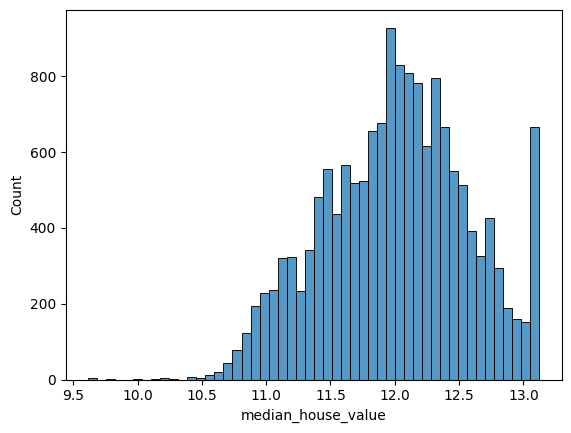

In [20]:
sns.histplot(df.median_house_value, bins=50)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [27]:
seed = 1
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value
y_val = df_val.median_house_value
y_test = df_test.median_house_value

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [30]:
dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## Question 1

In [38]:
dt = DecisionTreeRegressor(random_state=1, max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=1)

In [39]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



## Question 2

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [46]:
rfc = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_val)

score = mean_squared_error(y_val, y_pred, squared=False)
score

0.24518772479229903

## Question 3

In [129]:
scores = []
for n in range(10, 201, 10):
    rfc = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rfc.fit(X_train, y_train)

    y_pred = rfc.predict(X_val)

    score = mean_squared_error(y_val, y_pred, squared=False)
    scores.append((n,score))

In [57]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

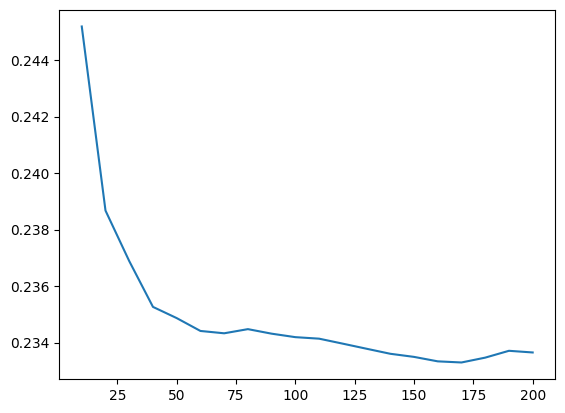

In [58]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

## Question 4

In [59]:
depths = [10,15,20,25]
scores = []
for d in depths:
    for n in range(10, 201, 10):
        rfc = RandomForestRegressor(n_estimators=n, random_state=1, max_depth=d, n_jobs=-1)
        rfc.fit(X_train, y_train)

        y_pred = rfc.predict(X_val)

        score = mean_squared_error(y_val, y_pred, squared=False)
        scores.append((n,d, score))

In [61]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'max_depth', 'rmse'])
df_scores

,n_estimators,max_depth,rmse
0,10,10,0.250677
1,20,10,0.247453
2,30,10,0.246281
3,40,10,0.245056
4,50,10,0.245466
...,...,...,...
75,160,25,0.233425
76,170,25,0.233438
77,180,25,0.233631
78,190,25,0.233869


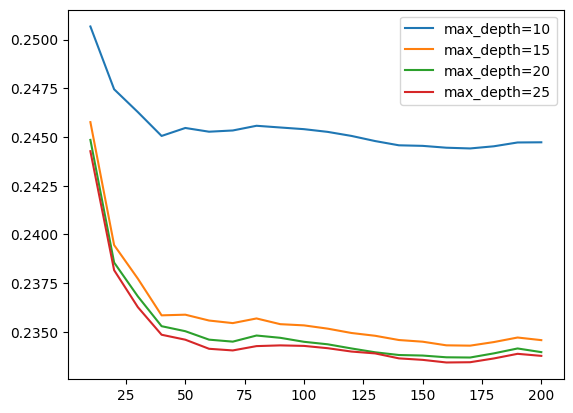

In [63]:
for d in depths:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

## Question 5

In [71]:
rfc = RandomForestRegressor(n_estimators=10, random_state=1, max_depth=20, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [72]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
9406,-118.00,34.12,37.0,1340.0,325.0,928.0,333.0,3.9219,INLAND
9407,-118.10,34.10,34.0,2578.0,645.0,1628.0,617.0,2.3400,<1H OCEAN
9408,-117.45,34.01,26.0,3042.0,598.0,1720.0,551.0,2.7600,INLAND
9409,-117.94,34.03,35.0,1375.0,249.0,1015.0,239.0,4.0521,<1H OCEAN


In [76]:
dv.feature_names_

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [73]:
rfc.feature_importances_

array([0.01502087, 0.03030503, 0.10195626, 0.08627638, 0.3355917 ,
       0.29247297, 0.07380644, 0.02715851, 0.01589402, 0.02151783])

In [130]:
feature_importance_df = pd.DataFrame({'feature': dv.get_feature_names_out(), 'importance': rfc.feature_importances_})


feature_importance_df.sort_values(by='importance', ascending=False)


,feature,importance
4,median_income,0.336527
5,ocean_proximity=<1H OCEAN,0.225849
6,ocean_proximity=INLAND,0.138413
2,latitude,0.100840
3,longitude,0.086452
1,housing_median_age,0.032071
7,population,0.027346
9,total_rooms,0.021727
8,total_bedrooms,0.015825
0,households,0.014950


## Question 6

In [89]:
features = [n.replace('<','') for n in dv.get_feature_names_out()]
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [109]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [120]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [131]:
%%capture output_03

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

In [133]:
scores = {}
scores['eta=0.3'] = parse_xgb_output(output_03)

In [134]:
%%capture output_01

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

In [135]:
scores['eta=0.1'] = parse_xgb_output(output_01)

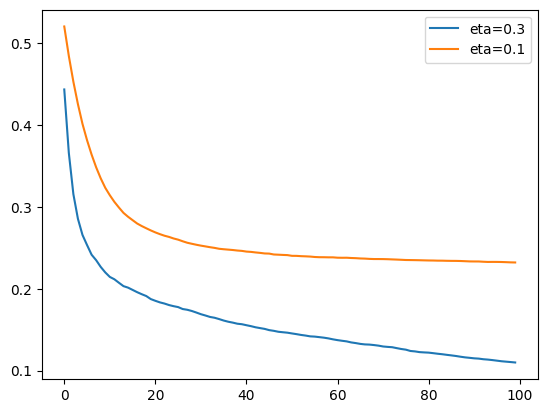

In [136]:
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].train_rmse, label='eta=0.3')
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_rmse, label='eta=0.1')
plt.legend()